# K-Means (Shopping Data)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
df = pd.read_csv("shopping_data.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Our dataset has five columns: CustomerID, Genre, Age, Annual Income, and Spending Score. 

To view the results in two-dimensional feature space, we will retain only two of these five columns. We can remove CustomerID column, Genre, and Age column.

We will retain the Annual Income (in thousands of dollars) and Spending Score (1-100) columns.

The Spending Score column signifies how often a person spends money in a mall on a scale of 1 to 100 with 100 being the highest spender.

In [7]:
final_df = df.iloc[: , 3:]

In [8]:
final_df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


<Figure size 1500x1200 with 0 Axes>

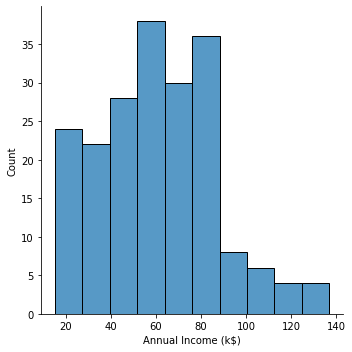

In [9]:
plt.figure(figsize= (10,8), dpi= 150)
sns.displot(data= final_df, x= "Annual Income (k$)")
plt.show()

<Figure size 1500x1200 with 0 Axes>

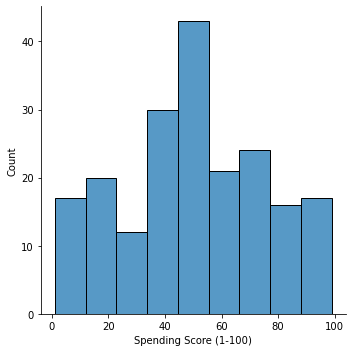

In [10]:
plt.figure(figsize= (10,8), dpi= 150)
sns.displot(data= final_df, x= "Spending Score (1-100)")
plt.show()

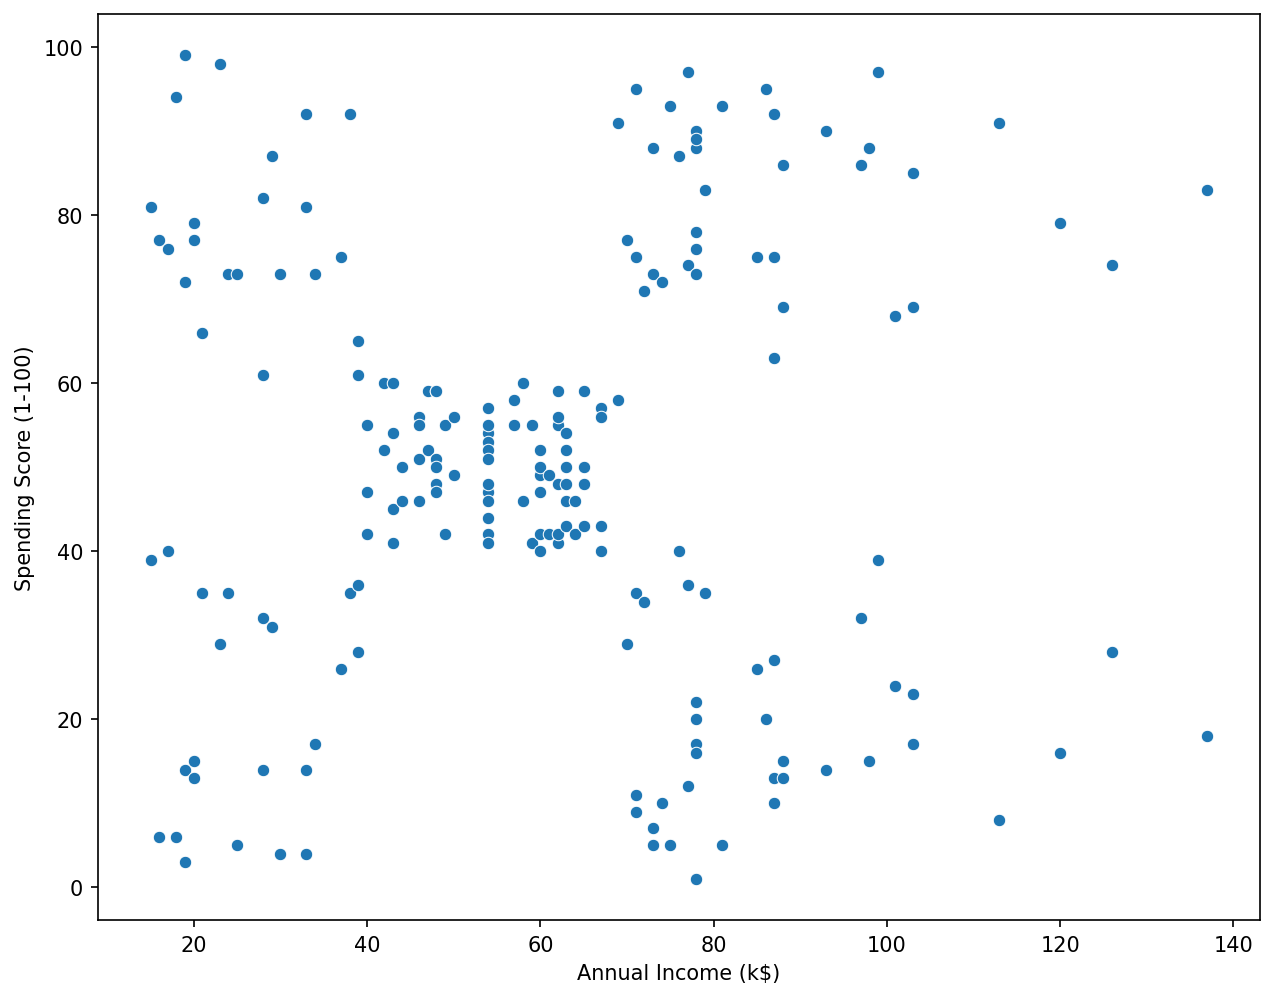

In [11]:
plt.figure(figsize= (10,8), dpi= 150)
sns.scatterplot(data= final_df, x= "Annual Income (k$)", y= "Spending Score (1-100)")
plt.show()

### Scalling:

In [12]:
sc = StandardScaler()

In [13]:
temp = sc.fit_transform(final_df)
final_df = pd.DataFrame(temp, columns= final_df.columns)
final_df.head()

,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


### Finding Optimal Number of Clusters Using Inertia and Silhouette Score:

In [19]:
inertia_list = []
sil_score = []

for k in range(2,11):
    
    kmc = KMeans(n_clusters= k)
    
    clusters = kmc.fit_predict(final_df)
    
    inertia_list.append(kmc.inertia_)
    
    sil_score.append(silhouette_score(final_df, clusters))

In [15]:
inertia_list

[269.01679374906655,
 157.70400815035939,
 108.92131661364358,
 65.56840815571681,
 55.057348270385965,
 46.408019688217685,
 37.182925370178474,
 32.34583777956662,
 29.17899042001402]

In [21]:
sil_score

[0.29512063001659344,
 0.46658474419000145,
 0.4939069237513199,
 0.5546571631111091,
 0.5378290321306309,
 0.5263454490712252,
 0.4542175096183406,
 0.4606235396891446,
 0.44043701938735624]

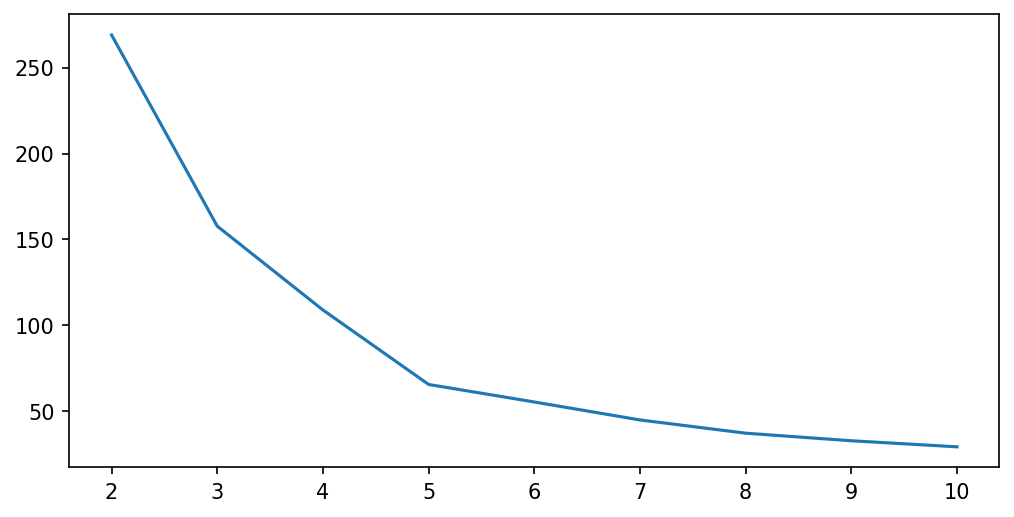

In [23]:
plt.figure(figsize= (8,4), dpi= 150)
plt.plot(range(2,11), inertia_list)
plt.show()

In [ ]:
# 3 or 5 Clusters Seem Good Enough Choice.

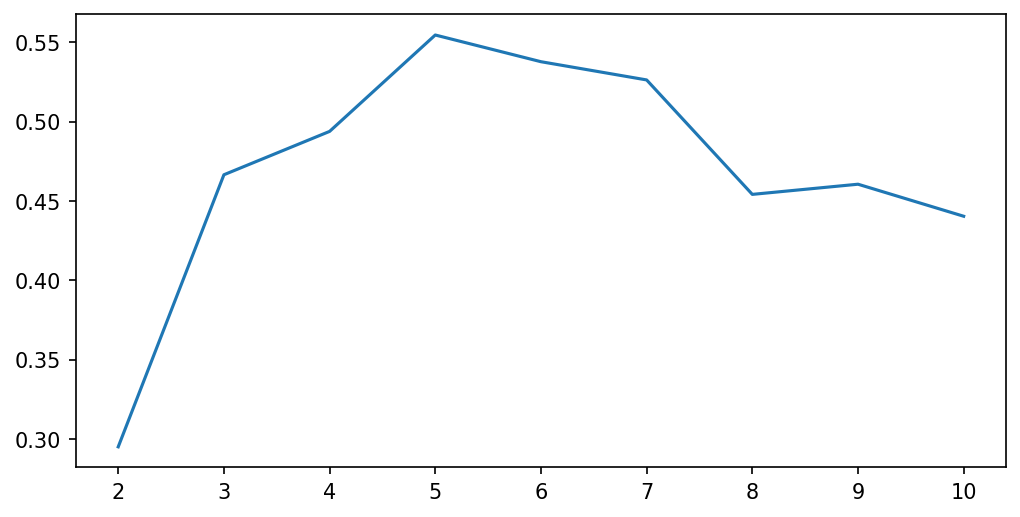

In [24]:
plt.figure(figsize= (8,4), dpi= 150)
plt.plot(range(2,11), sil_score)
plt.show()

In [ ]:
# So, By Considering Both Inertia and Silhouette Score, 5 Number of Clusters seems optimal.

### K-Means with 5 Clusters:

In [25]:
kmc = KMeans(n_clusters= 5)

In [26]:
clusters = kmc.fit_predict(final_df)

In [27]:
clusters

array([3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2,
       3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0,
       3, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [28]:
final_df["Cluster"] = clusters

In [29]:
final_df.head()

,Annual Income (k$),Spending Score (1-100),Cluster
0,-1.738999,-0.434801,3
1,-1.738999,1.195704,2
2,-1.700830,-1.715913,3
3,-1.700830,1.040418,2
4,-1.662660,-0.395980,3


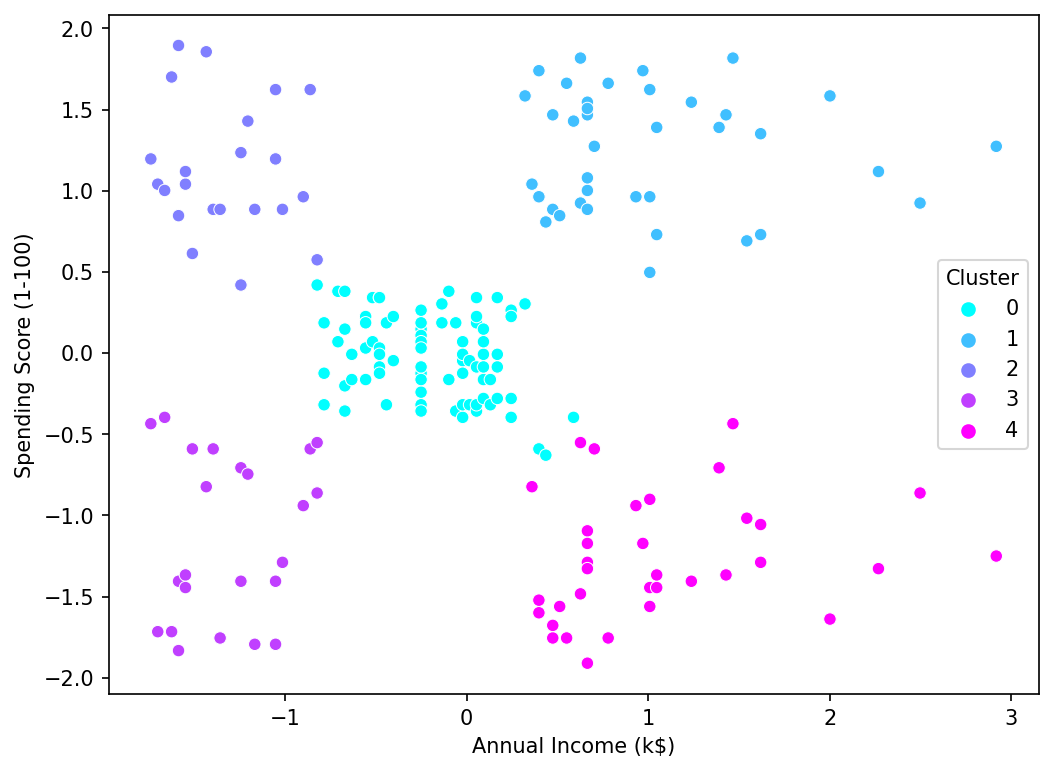

In [33]:
plt.figure(figsize= (8,6), dpi= 150)
sns.scatterplot(data= final_df, x= "Annual Income (k$)", y= "Spending Score (1-100)", hue= "Cluster", palette = "cool")
plt.show()